<a href="https://colab.research.google.com/github/mateuspalacio/grupo_four_jupyter/blob/main/AV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix,r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from math import sqrt
from datetime import date, timedelta
import tensorflow as tf


from math import sqrt

transformar_features = True

import itertools
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import multiprocessing as mp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [3]:
tf.test.gpu_device_name()

''

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
path = os.path.join('VendasTesouroDireto_1.json')
values = pd.read_json(path)
df_data = pd.DataFrame(values)
df_data['Tipo_Titulo'] = df_data['Tipo_Titulo'].astype('str') 
df_data['PU'] = df_data['PU'].str.replace(',', '.')
df_data['Quantidade'] = df_data['Quantidade'].str.replace(',', '.')
df_data['Valor'] = df_data['Valor'].str.replace(',', '.')
df_data['PU'] = pd.to_numeric(df_data['PU'],errors='coerce')
df_data['Quantidade'] = pd.to_numeric(df_data['Quantidade'], errors='coerce')
df_data['Valor'] = pd.to_numeric(df_data['Valor'], errors='coerce')

df_data['Vencimento_do_Titulo'] = pd.to_datetime(df_data['Vencimento_do_Titulo'],errors='coerce',dayfirst=True)
 
df_data['Data_Venda'] = pd.to_datetime(df_data['Data_Venda'],errors='coerce', dayfirst=True)

df_data

,Tipo_Titulo,Vencimento_do_Titulo,Data_Venda,PU,Quantidade,Valor
0,Tesouro IPCA+ com Juros Semestrais,2012-08-15,2008-12-05,1655.206735,38.6,63890.97
1,Tesouro IPCA+ com Juros Semestrais,2017-05-15,2008-12-05,1480.154343,571.0,845168.12
2,Tesouro Prefixado com Juros Semestrais,2014-01-01,2008-12-05,870.303177,283.2,246469.85
3,Tesouro Prefixado com Juros Semestrais,2012-01-01,2008-12-05,936.285273,29.2,27339.52
4,Tesouro Prefixado com Juros Semestrais,2017-01-01,2008-12-05,808.587250,491.8,397663.20
...,...,...,...,...,...,...
66164,Tesouro Prefixado com Juros Semestrais,2010-01-01,2008-08-27,960.339019,110.2,105829.35
66165,Tesouro IPCA+ com Juros Semestrais,2010-08-15,2008-08-27,1672.613421,271.2,453612.75
66166,Tesouro IPCA+ com Juros Semestrais,2011-05-15,2008-08-27,1677.517573,88.2,147957.04
66167,Tesouro Prefixado com Juros Semestrais,2010-07-01,2008-08-27,946.566666,0.6,567.93


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66169 entries, 0 to 66168
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo_Titulo           66169 non-null  object        
 1   Vencimento_do_Titulo  66169 non-null  datetime64[ns]
 2   Data_Venda            66169 non-null  datetime64[ns]
 3   PU                    66169 non-null  float64       
 4   Quantidade            66169 non-null  float64       
 5   Valor                 66169 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.0+ MB


In [7]:
pu = df_data['Quantidade']
# será se deve ser essas colunas mesmo?
df_features = df_data.drop(columns=['Tipo_Titulo', 'Vencimento_do_Titulo', 'Data_Venda', 'Quantidade'])

df_features

,PU,Valor
0,1655.206735,63890.97
1,1480.154343,845168.12
2,870.303177,246469.85
3,936.285273,27339.52
4,808.587250,397663.20
...,...,...
66164,960.339019,105829.35
66165,1672.613421,453612.75
66166,1677.517573,147957.04
66167,946.566666,567.93


In [8]:
df_dados_c0=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado com Juros Semestrais']
df_dados_c1=df_data[df_data['Tipo_Titulo']=='Tesouro Selic']
df_dados_c2=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado']
df_dados_c3=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado IPCA+']
df_dados_c4=df_data[df_data['Tipo_Titulo']=='Tesouro IGPM+ com Juros Semestrais']
df_dados_c5=df_data[df_data['Tipo_Titulo']=='Tesouro Prefixado IPCA+ com Juros Semestrais']

In [9]:
df_dados_c1['d_semana'] = df_dados_c1['Data_Venda'].dt.strftime("%u")
df_dados_c1['d_mes'] = df_dados_c1['Data_Venda'].dt.strftime("%d")
df_dados_c1['d_ano'] = df_dados_c1['Data_Venda'].dt.strftime("%j")

df_dados_c1['d_semana'] = df_dados_c1['d_semana'].astype(int)
df_dados_c1['d_mes'] = df_dados_c1['d_mes'].astype(int)
df_dados_c1['d_ano'] = df_dados_c1['d_ano'].astype(int)

df_dados_c1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Tipo_Titulo,Vencimento_do_Titulo,Data_Venda,PU,Quantidade,Valor,d_semana,d_mes,d_ano
6,Tesouro Selic,2012-03-07,2008-12-05,3694.700000,83.2,307399.04,5,5,340
9,Tesouro Selic,2014-03-07,2008-12-05,3692.770059,133.6,493354.07,5,5,340
27,Tesouro Selic,2012-03-07,2009-01-02,3728.658416,140.2,522757.90,5,2,2
32,Tesouro Selic,2014-03-07,2009-01-02,3726.728894,39.8,148323.80,5,2,2
47,Tesouro Selic,2012-03-07,2009-01-05,3730.540024,409.0,1525790.86,1,5,5
...,...,...,...,...,...,...,...,...,...
66128,Tesouro Selic,2014-03-07,2008-07-30,3534.769820,100.4,354890.88,3,30,212
66138,Tesouro Selic,2012-03-07,2008-08-26,3566.330371,75.4,268901.30,2,26,239
66144,Tesouro Selic,2014-03-07,2008-08-26,3567.210000,76.0,271107.96,2,26,239
66162,Tesouro Selic,2012-03-07,2008-08-27,3568.050000,175.4,625835.97,3,27,240


In [10]:
feature_names = ['PU','Quantidade', 'Valor','d_semana','d_mes','d_ano']
df_features_c1=df_dados_c1.drop(columns=['Tipo_Titulo','Data_Venda','Vencimento_do_Titulo'])
df_features_c1_datas = df_dados_c1.drop(columns=['Tipo_Titulo','Vencimento_do_Titulo'])
df_features_c1

,PU,Quantidade,Valor,d_semana,d_mes,d_ano
6,3694.700000,83.2,307399.04,5,5,340
9,3692.770059,133.6,493354.07,5,5,340
27,3728.658416,140.2,522757.90,5,2,2
32,3726.728894,39.8,148323.80,5,2,2
47,3730.540024,409.0,1525790.86,1,5,5
...,...,...,...,...,...,...
66128,3534.769820,100.4,354890.88,3,30,212
66138,3566.330371,75.4,268901.30,2,26,239
66144,3567.210000,76.0,271107.96,2,26,239
66162,3568.050000,175.4,625835.97,3,27,240


In [11]:
# aplicando escala pros valores ficarem entre 0 e 1
if(transformar_features): 
    scaler = MinMaxScaler(feature_range=(0, 1))

    df_features_c1[feature_names] = scaler.fit_transform(df_features_c1[feature_names])

    df_features_c1

In [12]:
df_features_c1

,PU,Quantidade,Valor,d_semana,d_mes,d_ano
6,0.329015,0.002372,0.000869,1.00,0.133333,0.931129
9,0.328835,0.003813,0.001396,1.00,0.133333,0.931129
27,0.332183,0.004002,0.001479,1.00,0.033333,0.000000
32,0.332003,0.001132,0.000419,1.00,0.033333,0.000000
47,0.332359,0.011685,0.004318,0.00,0.133333,0.008264
...,...,...,...,...,...,...
66128,0.314096,0.002864,0.001004,0.50,0.966667,0.578512
66138,0.317040,0.002149,0.000760,0.25,0.833333,0.652893
66144,0.317122,0.002167,0.000767,0.25,0.833333,0.652893
66162,0.317201,0.005008,0.001771,0.50,0.866667,0.655647


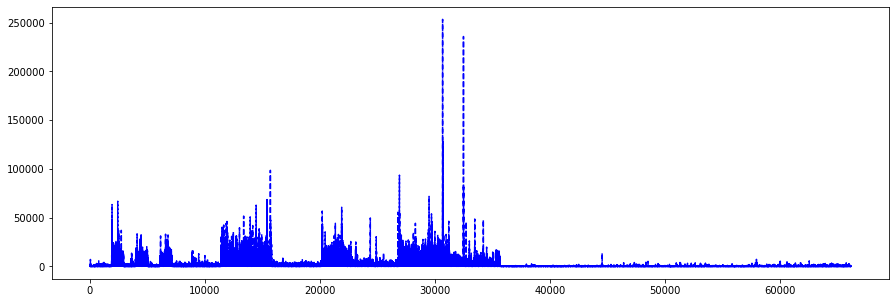

In [13]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_data)),df_data['Quantidade'], 'b--')
# plt.xlim(300,600)
plt.show()

In [14]:
time_steps = 365
test_size = 120

train_size = int(len(df_features_c1)-(test_size))
train, test = df_features_c1.iloc[0:train_size], df_features_c1.iloc[(train_size-time_steps):len(df_features_c1)]

print(len(train), len(test))

7837 485


In [15]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps),0].to_numpy()
        v = np.append(v,X.iloc[i + time_steps,1])#price
        v = np.append(v,X.iloc[i + time_steps,2])#d_semana
        v = np.append(v,X.iloc[i + time_steps,3])#d_mes
        v = np.append(v,X.iloc[i + time_steps,4])#d_ano
        Xs.append([v])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train, train['Quantidade'], time_steps)
X_test, y_test = create_dataset(test, test['Quantidade'], time_steps)

In [16]:
print(len(y_train),len(y_test))

7472 120


In [17]:
def getModel():
    model = tf.keras.Sequential()
    
    # MLP    
    # model.add(tf.keras.layers.Dense(300, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dense(3000, activation="relu"))
    model.add(tf.keras.layers.Dense(1000, activation="relu"))
    model.add(tf.keras.layers.Dense(900, activation="relu"))
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(90, activation="relu"))
    model.add(tf.keras.layers.Dense(30, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="relu"))
    
    # Vanilla LSTM
    # model.add(tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
        
    # Stacked LSTM
#     model.add(tf.keras.layers.LSTM(3000, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(tf.keras.layers.LSTM(1000, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(300, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(30, activation='relu', return_sequences=True))
#     model.add(tf.keras.layers.LSTM(10, activation='relu'))
    
    # Bidirectional LSTM
#     model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(tf.keras.layers.Dense(units=1,activation='softplus'))
    
    return model

In [18]:
model = getModel()

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)

In [21]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')]

callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=0, restore_best_weights=True))

history = model.fit(
    X_train, y_train,
    epochs=50, #1000
    batch_size=300, # 30
    validation_split=0.4,
    callbacks=callbacks,
    shuffle=False
)

Epoch 1/50
15/15 [==============================] - 4s 237ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 2/50
15/15 [==============================] - 4s 238ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 3/50
15/15 [==============================] - 4s 241ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 4/50
15/15 [==============================] - 4s 240ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 5/50
15/15 [==============================] - 4s 238ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 6/50
15/15 [==============================] - 4s 237ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 7/50
15/15 [==============================] - 4s 245ms/step - loss: 0.0050 - val_loss: 1.3459e-05 - lr: 1.0000e-04
Epoch 8/50
15/15 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00008: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-0

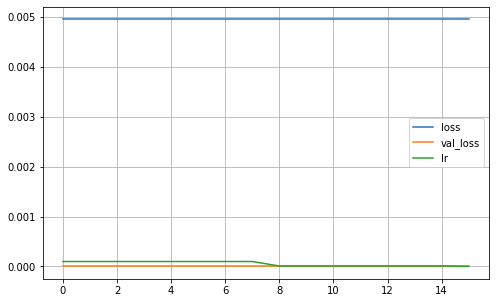

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()